In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import requests
import gc

In [2]:
from dask.distributed import Client

client = Client()
client.run(gc.collect)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.61 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64306,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.61 GiB
Comm: tcp://127.0.0.1:64338,Total threads: 3
Dashboard: http://127.0.0.1:64339/status,Memory: 3.90 GiB
Nanny: tcp://127.0.0.1:64312,


In [4]:
ecco_dir_ = 'D:/ECCOv4_heat_transport'
otrans_ = 'ocean_transport_terms'

tr_fs_ = [f'{ecco_dir_}/{otrans_}/{f}' for f in os.listdir(f'{ecco_dir_}/{otrans_}') if '.nc' in f]
tr_fs_[0:4]

['D:/ECCOv4_heat_transport/ocean_transport_terms/OCEAN_3D_TEMPERATURE_FLUX_day_mean_2012-01-01_ECCO_V4r4_native_llc0090.nc',
 'D:/ECCOv4_heat_transport/ocean_transport_terms/OCEAN_3D_TEMPERATURE_FLUX_day_mean_2012-01-02_ECCO_V4r4_native_llc0090.nc',
 'D:/ECCOv4_heat_transport/ocean_transport_terms/OCEAN_3D_TEMPERATURE_FLUX_day_mean_2012-01-03_ECCO_V4r4_native_llc0090.nc',
 'D:/ECCOv4_heat_transport/ocean_transport_terms/OCEAN_3D_TEMPERATURE_FLUX_day_mean_2012-01-04_ECCO_V4r4_native_llc0090.nc']

In [6]:
ds = xr.open_mfdataset(tr_fs_[0:367])


In [7]:
ds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50, k_p1: 51, tile: 13, time: 367, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds     (k, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    ADVx_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFxE_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFyE_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2012-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             2012-01-01T00:00:00
    title:                           ECCO Ocean Three-Dimensional Potential T...
    uuid:                            c4295540-4162-11eb-b51b-0cc47a3f47b1

In [11]:
ecco.plot_proj_to_latlon_grid

<function ecco_v4_py.tile_plot_proj.plot_proj_to_latlon_grid(lons, lats, data, projection_type='robin', dx=0.25, dy=0.25, radius_of_influence=112000, plot_type='pcolormesh', cmap=None, cmin=None, cmax=None, user_lon_0=0, user_lat_0=None, lat_lim=50, parallels=None, show_coastline=True, show_colorbar=False, show_land=True, show_grid_lines=True, show_grid_labels=False, show_coastline_over_data=True, show_land_over_data=True, grid_linewidth=1, grid_linestyle='--', colorbar_label=None, subplot_grid=None, less_output=True, **kwargs)>

-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\uv20102\Anaconda3\envs\CMIP6_field_analysis_env\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


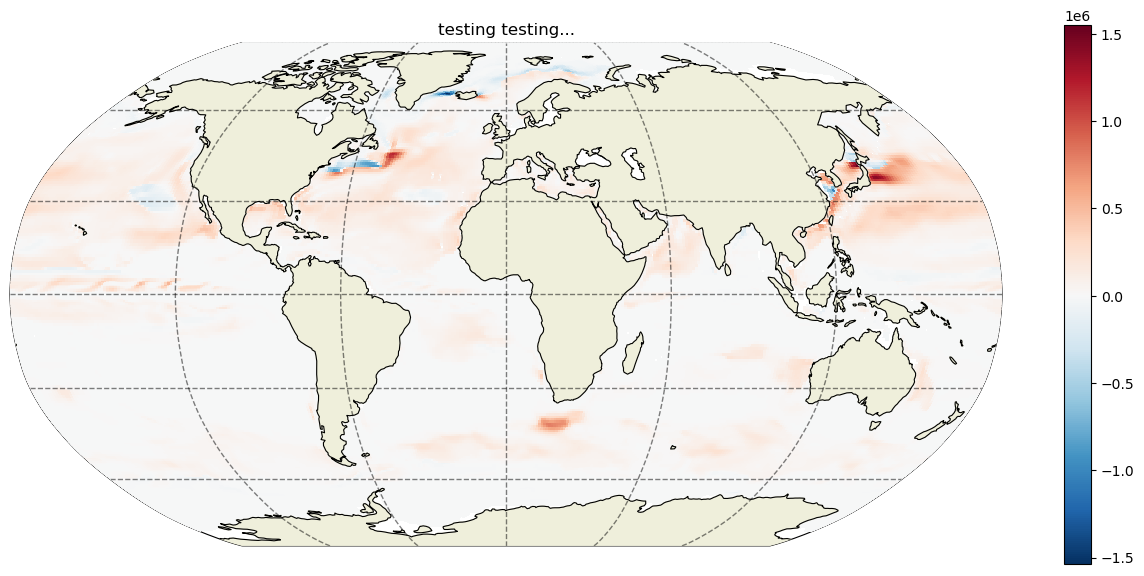

In [12]:
# test plot, seems the grid info is actually in the files, which is nice
vdiff  = ds.DFrE_TH.isel(time=0, k_l=3)
# mask to nan where hFacC(k=0) = 0
#SSH  = SSH.where(grid.hFacC.isel(k=0))

fig  = plt.figure(figsize=(16,7))

ecco.plot_proj_to_latlon_grid(ds.XC, ds.YC, vdiff,
                              central_longitude=-180,
                              show_colorbar=True,
)
plt.title('testing testing...')
plt.show()


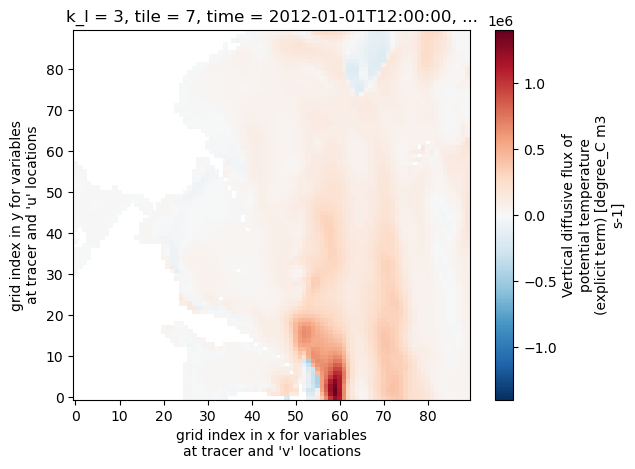

In [14]:
vdiff.isel(tile=7).plot()

In [16]:
vdiff.dims

('tile', 'j', 'i')

In [26]:
X, Y, Z = 45, 80, 5

ne_pac = ds.isel(tile=7, i=X, i_g=X, j=Y, j_g=Y, k=Z, k_l=Z)

ne_pac

<xarray.Dataset>
Dimensions:    (k_u: 50, k_p1: 51, time: 367, nv: 2, nb: 4)
Coordinates: (12/22)
    i          int32 45
    i_g        int32 45
    j          int32 80
    j_g        int32 80
    k          int32 5
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         float32 dask.array<chunksize=(), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (nb) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    YC_bnds    (nb) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    Z_bnds     (nv) float32 dask.array<chunksize=(2,), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    ADVx_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    DFxE_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ADVy_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    DFyE_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ADVr_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    DFrE_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    DFrI_TH    (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/62)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2012-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             2012-01-01T00:00:00
    title:                           ECCO Ocean Three-Dimensional Potential T...
    uuid:                            c4295540-4162-11eb-b51b-0cc47a3f47b1

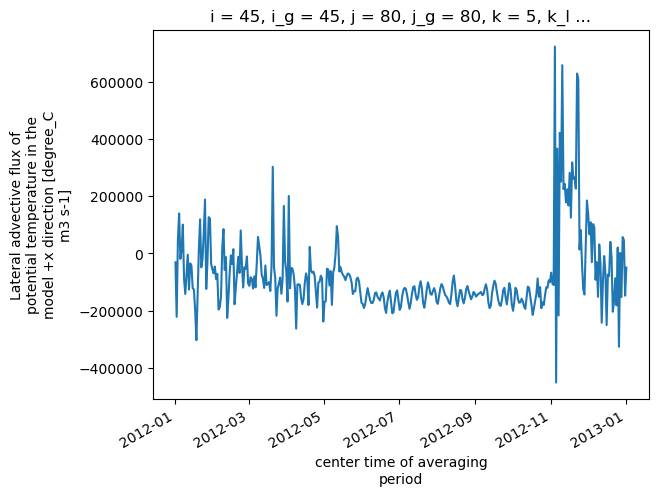

In [27]:
ne_pac.ADVx_TH.plot()

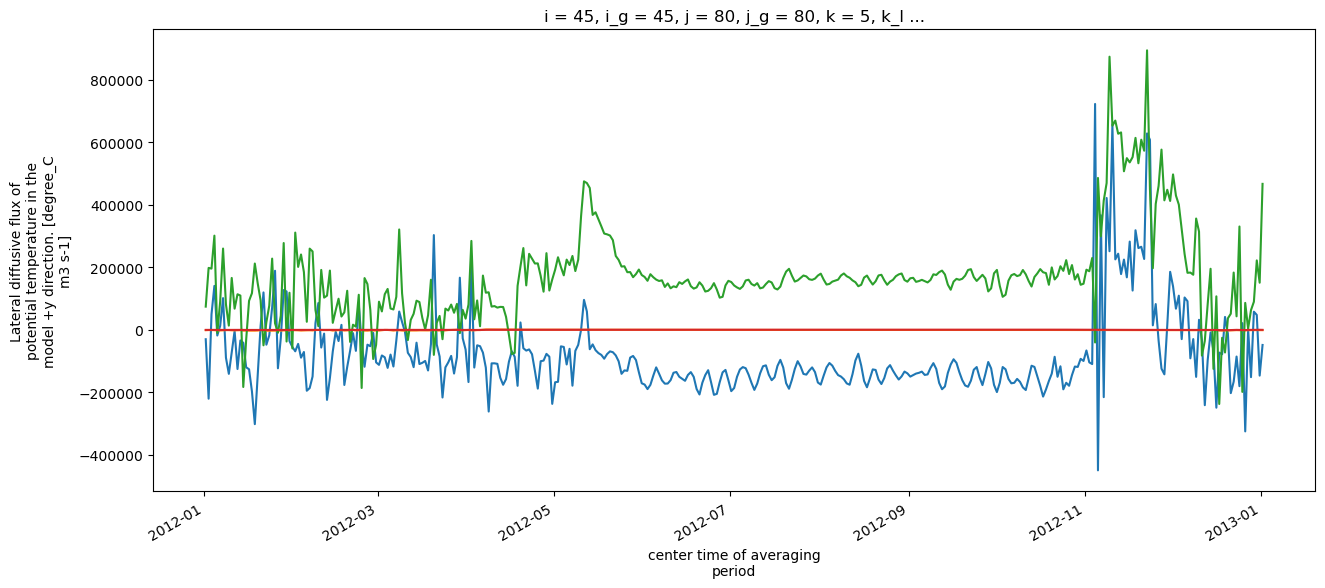

In [28]:
vars_ = ['ADVx_TH','DFxE_TH','ADVy_TH','DFyE_TH']

fig, ax = plt.subplots(figsize=(15,6))

for v in vars_:
    ne_pac[v].plot(ax=ax)

In [29]:
client.shutdown()